In [91]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [92]:
IMAGE_SIZE=256
BATCH_SIZE=9
CHANNEL=3


In [93]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("Tomato by us",
                                                            shuffle=True,
                                                            image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                            batch_size=BATCH_SIZE
                                                           )

Found 713 files belonging to 4 classes.


In [94]:
class_names=dataset.class_names
class_names

['Ripe', 'Rotten', 'Semi_ripped', 'Unripped']

In [95]:
n_classes = len(dataset.class_names)  # e.g., 6
n_classes

4

In [96]:
len(dataset)

80

In [97]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[1])

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(256, 256, 3), dtype=float32)


In [98]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    #euta batch ma vayeko shape ra numpy
    #tesnor is converted into tensor

(9, 256, 256, 3)
[1 0 3 1 0 1 0 2 3]


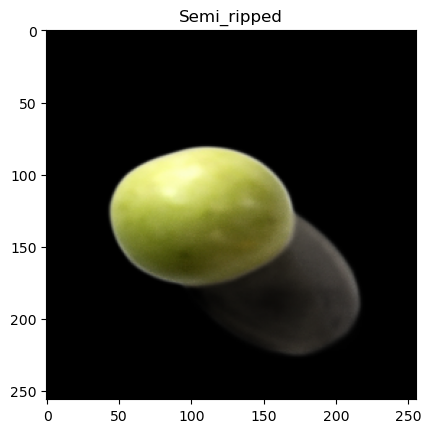

In [99]:
#printng one image
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

In [100]:
len(dataset)

80

In [101]:
train_size=0.8
len(dataset)*train_size

64.0

In [102]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [103]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [104]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [105]:
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(0.2)
# ])
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])



In [106]:
from tensorflow.keras import layers, models

input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 2  # Example: good vs bad tomato

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.MaxPooling2D((2, 2), padding='same'),

    #  layers.Conv2D(32, (3, 3), activation='relu', padding='same',  input_shape=input_shape),
    # layers.AveragePooling2D(pool_size=(2, 2), padding='same'),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Build and show model summary
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_7 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_8 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │       1,048,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,068,132 (4.07 MB)

 Trainable params: 1,068,132 (4.07 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [108]:
history=model.fit(
    train_ds,
    epochs=100,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 74s 911ms/step - accuracy: 0.5447 - loss: 1.1131 - val_accuracy: 0.7083 - val_loss: 0.8407
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 509ms/step - accuracy: 0.6672 - loss: 0.8014 - val_accuracy: 0.8333 - val_loss: 0.5882
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 536ms/step - accuracy: 0.7269 - loss: 0.6797 - val_accuracy: 0.8472 - val_loss: 0.5303
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 492ms/step - accuracy: 0.7087 - loss: 0.6888 - val_accuracy: 0.8056 - val_loss: 0.5567
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 498ms/step - accuracy: 0.7234 - loss: 0.6577 - val_accuracy: 0.7083 - val_loss: 0.6322
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 519ms/step - accuracy: 0.7326 - loss: 0.6015 - val_accuracy: 0.8472 - val_loss: 0.4433
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 528ms/step - accuracy: 0.8053 - loss: 0.4919 - val_accuracy: 0.8333 - val_loss: 0.4565
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 515ms/step - accuracy: 0.7557 - loss: 0.4995 - 

In [109]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 170ms/step - accuracy: 0.9906 - loss: 0.0439


In [111]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


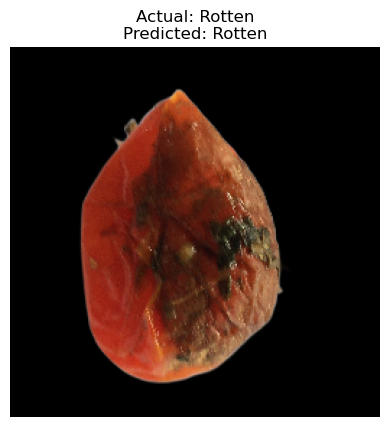

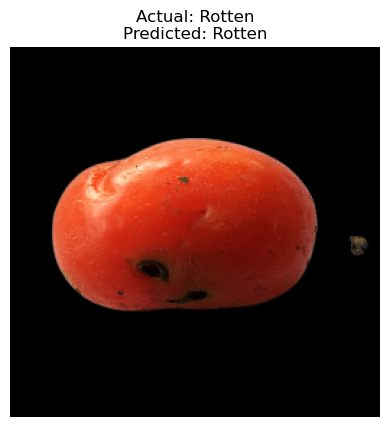

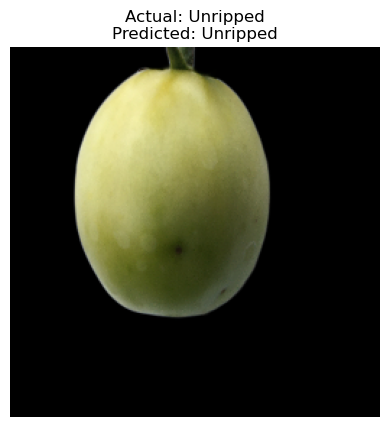

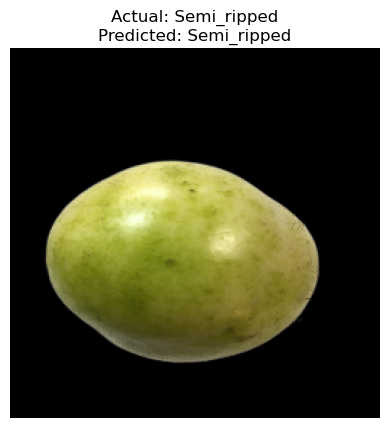

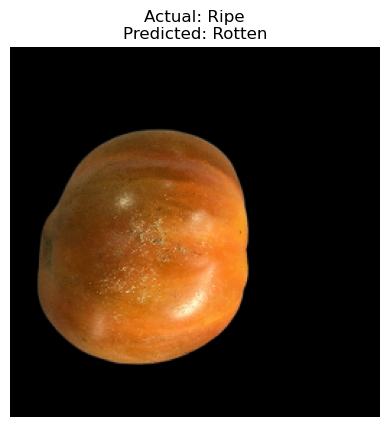

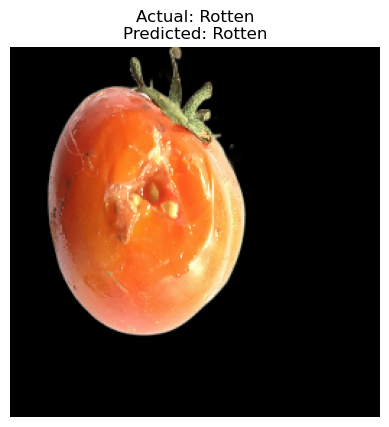

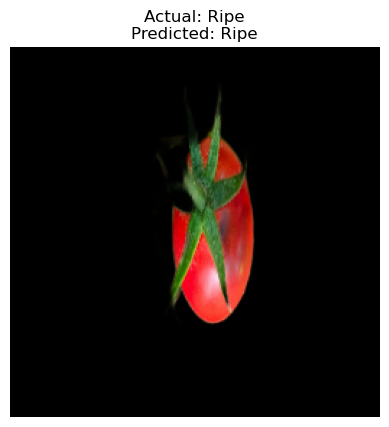

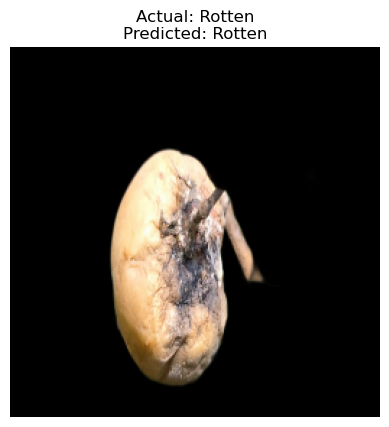

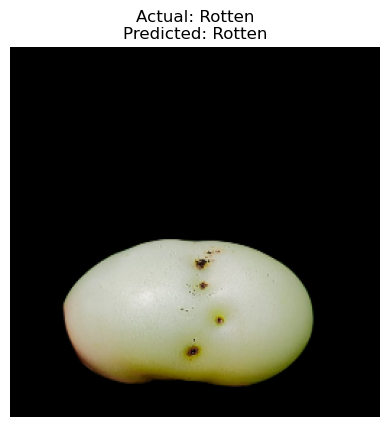

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


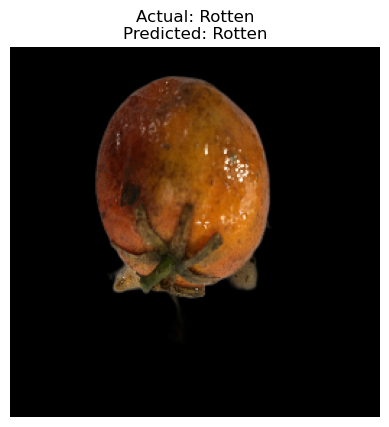

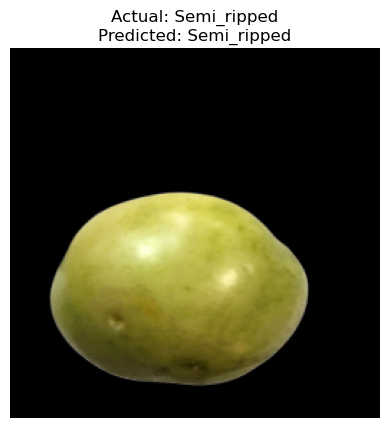

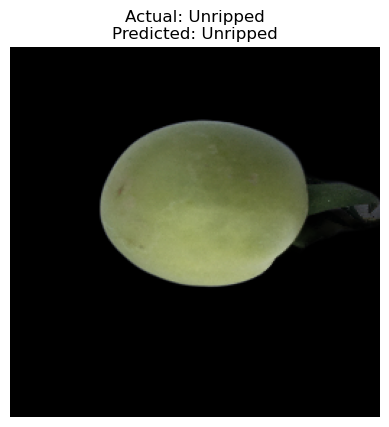

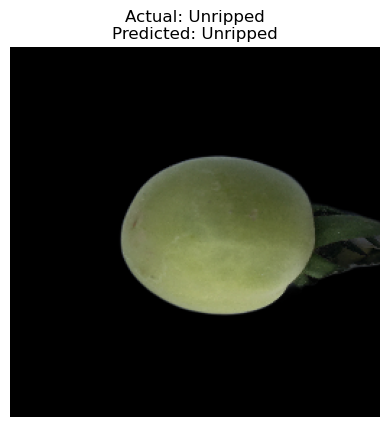

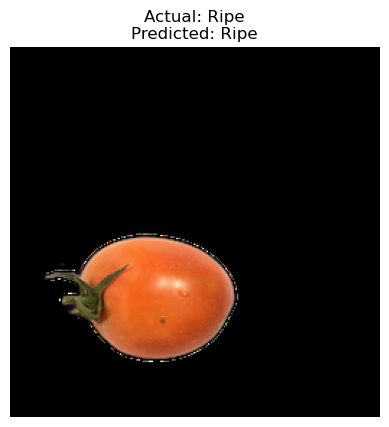

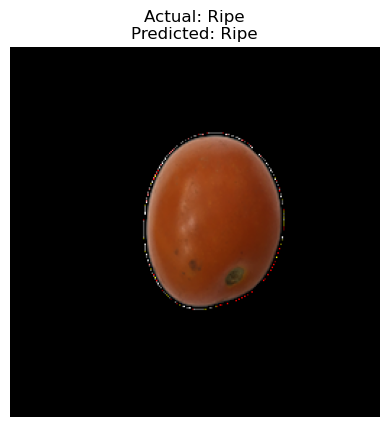

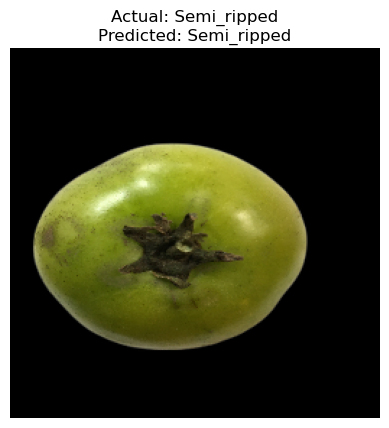

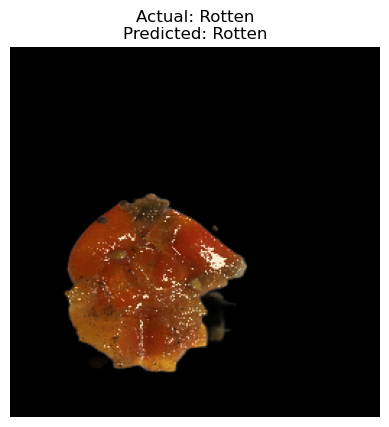

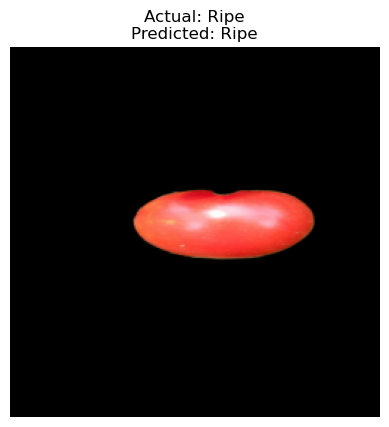

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


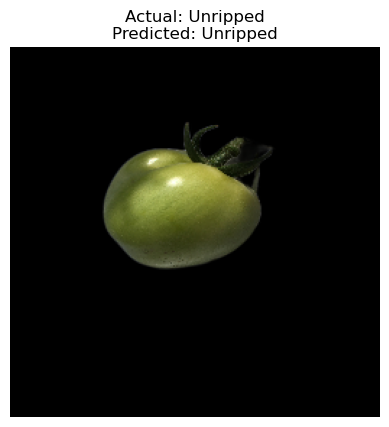

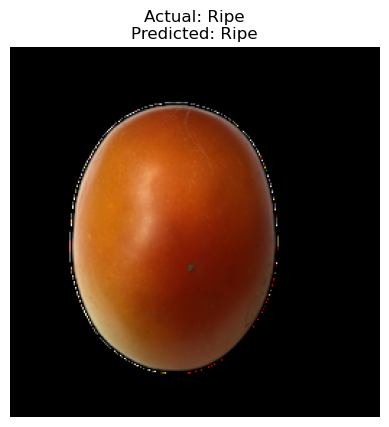

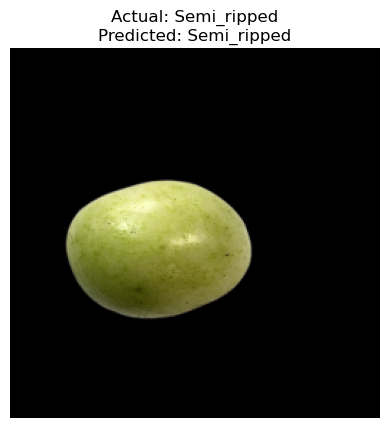

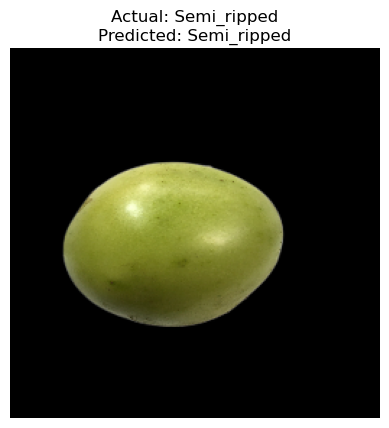

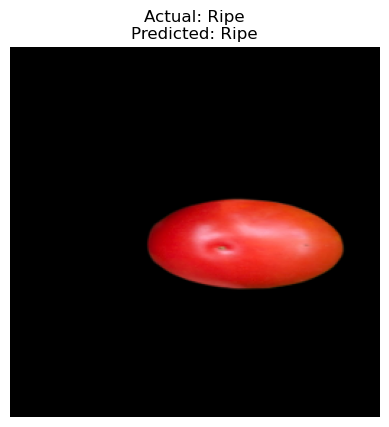

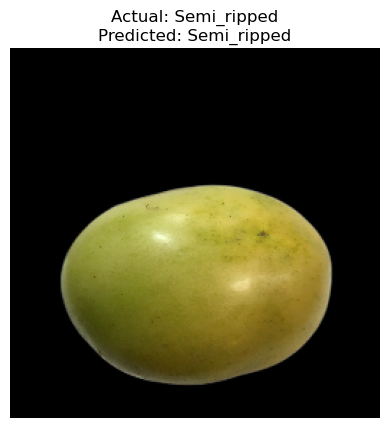

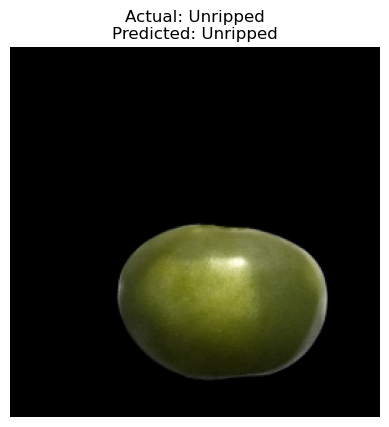

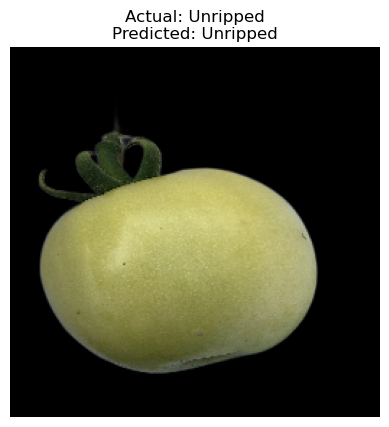

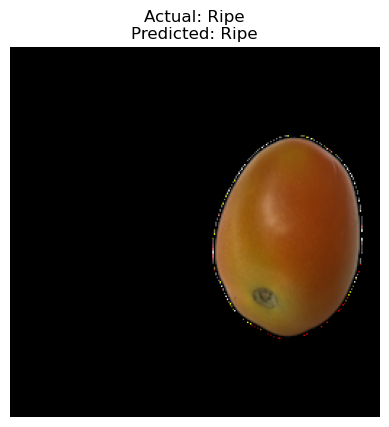

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


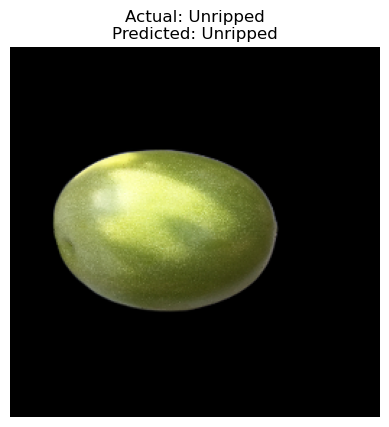

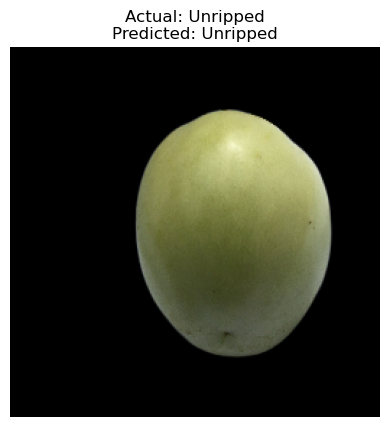

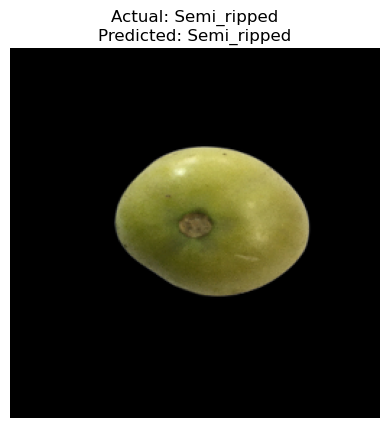

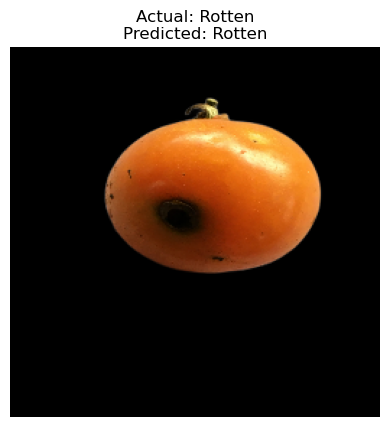

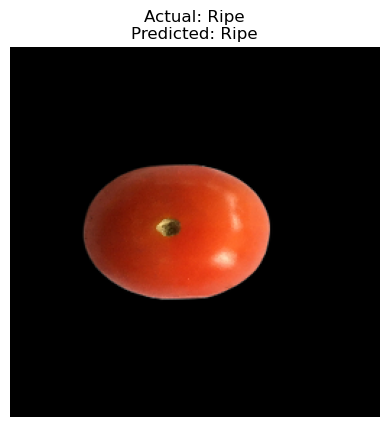

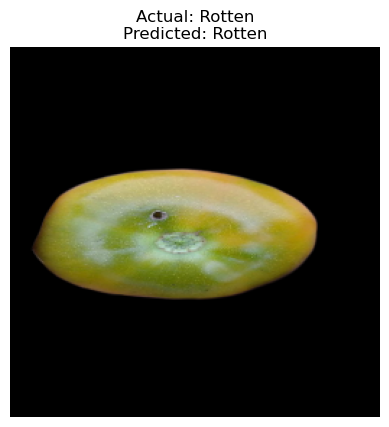

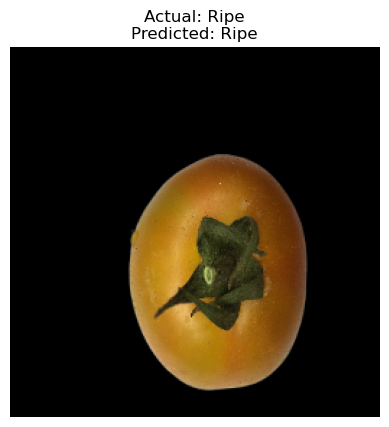

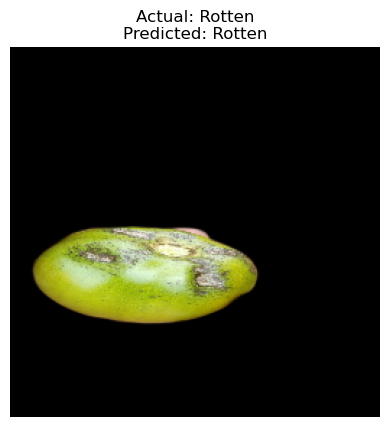

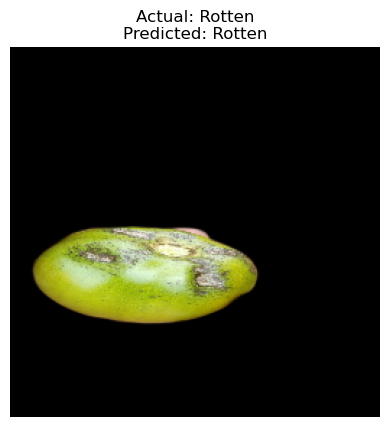

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


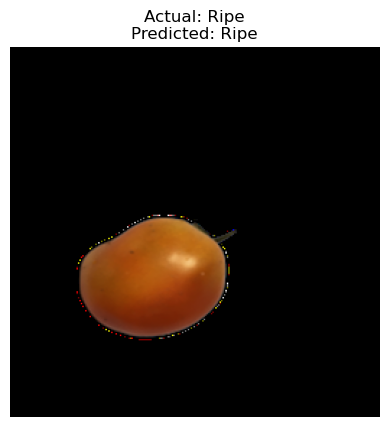

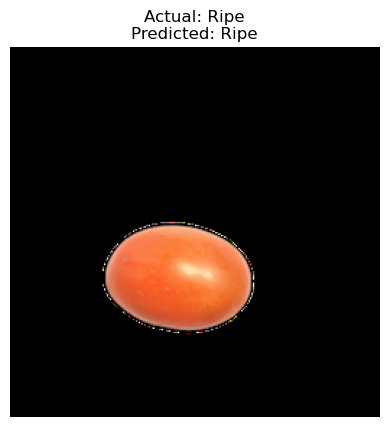

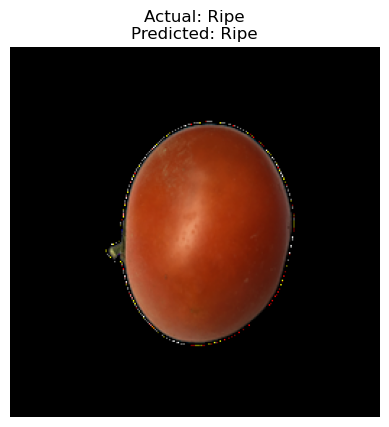

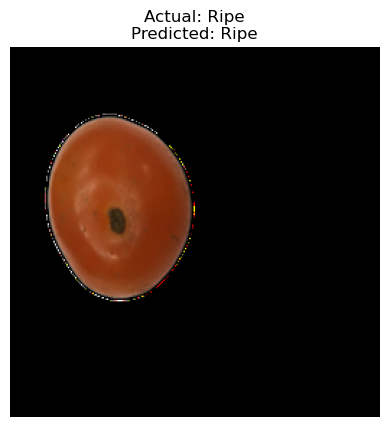

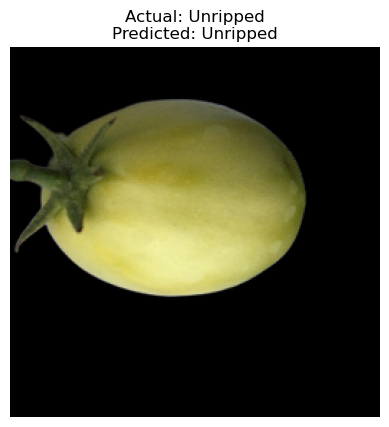

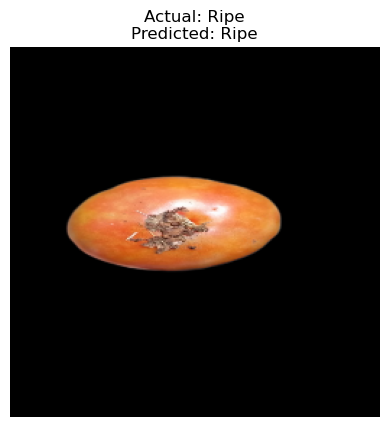

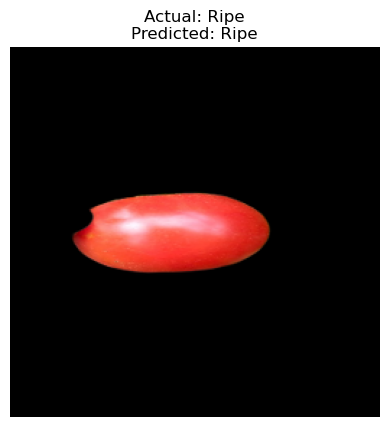

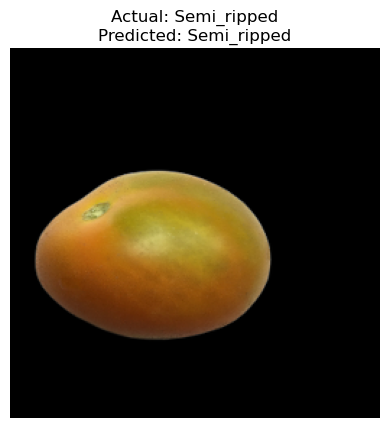

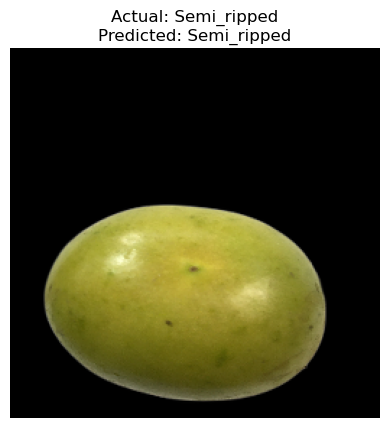

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


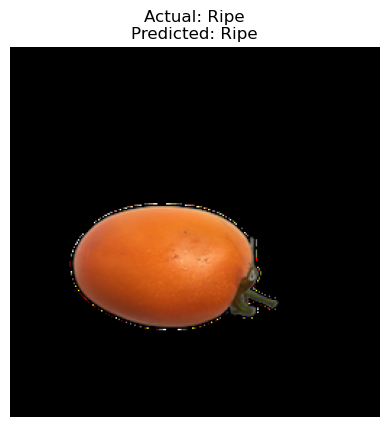

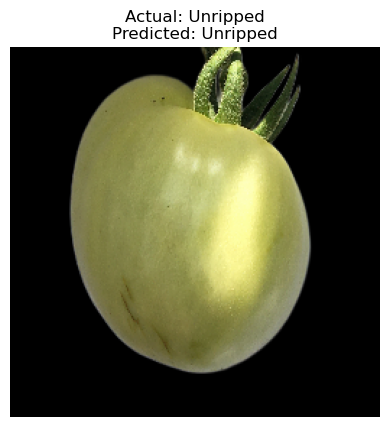

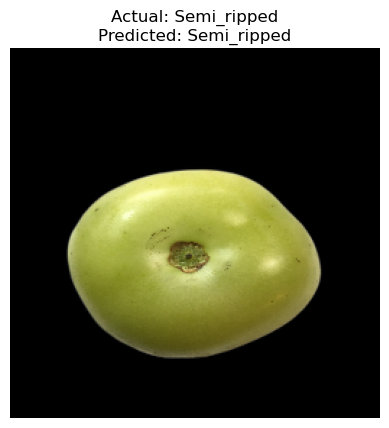

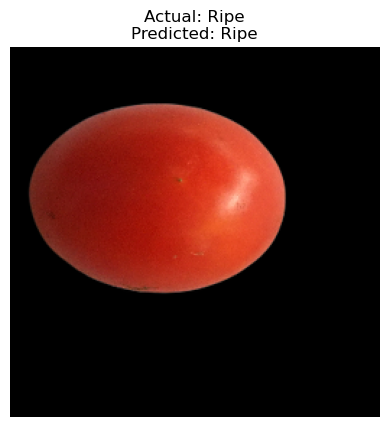

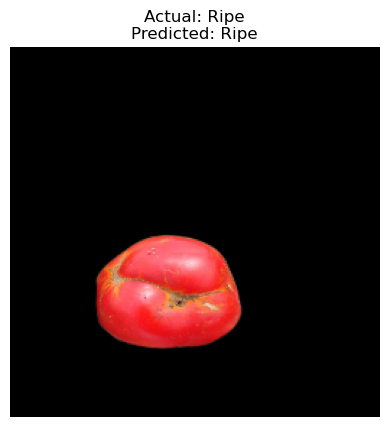

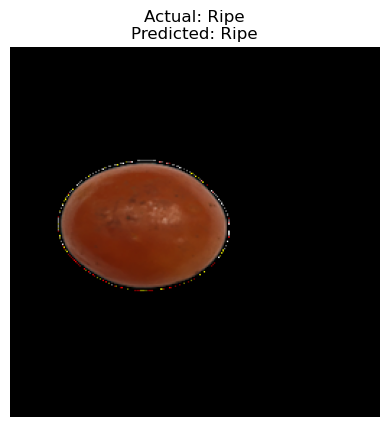

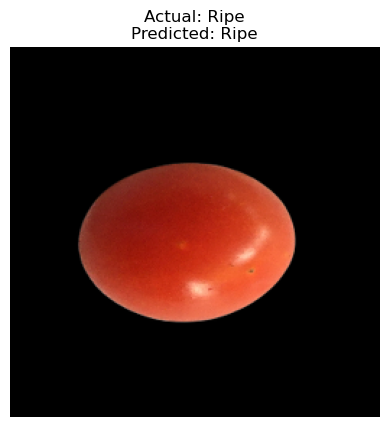

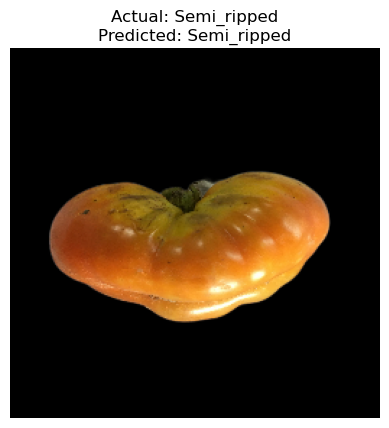

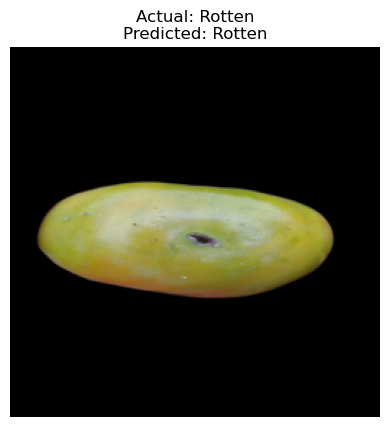

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


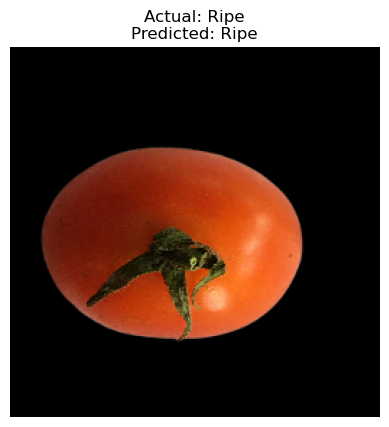

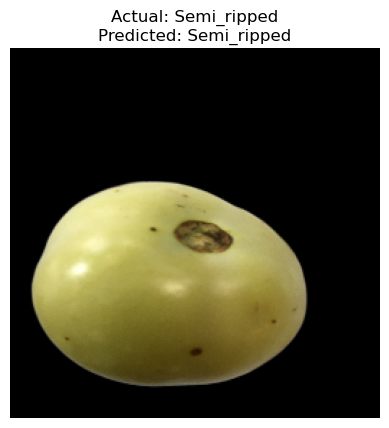

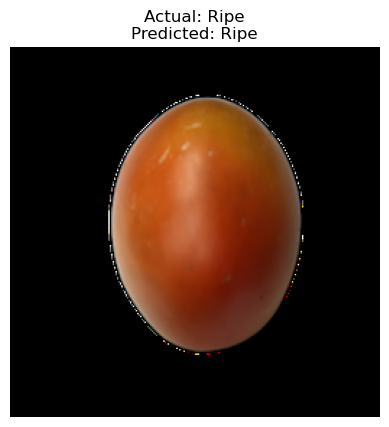

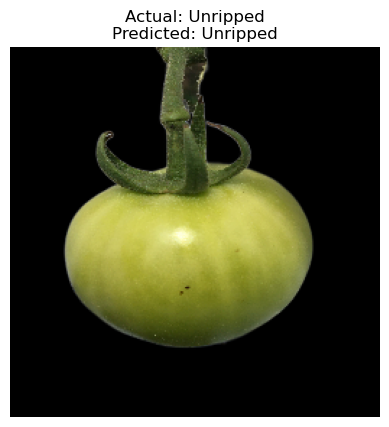

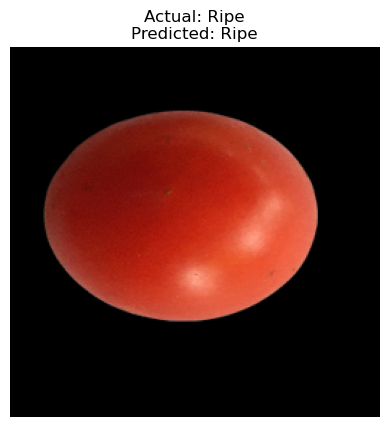

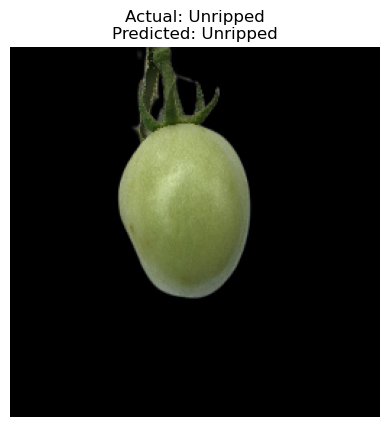

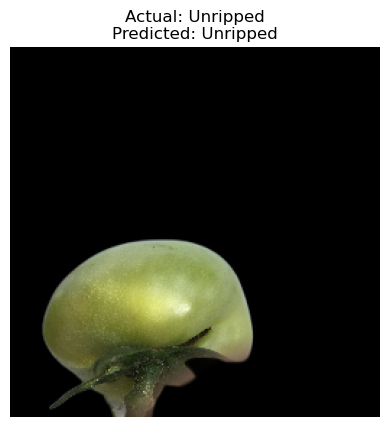

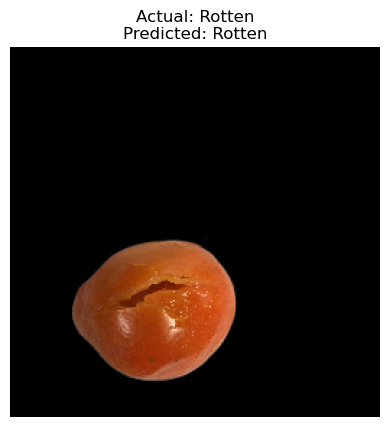

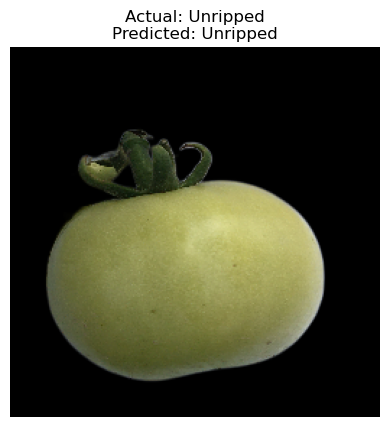

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


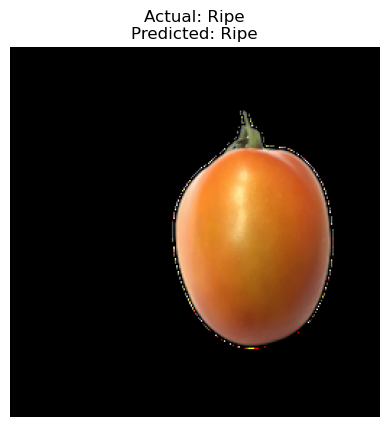

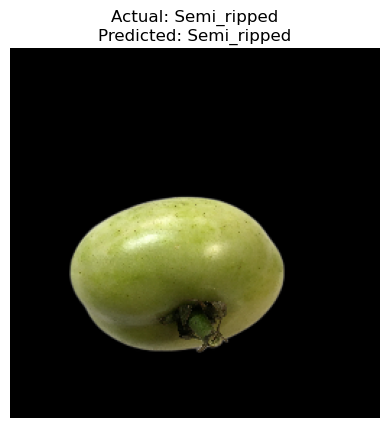

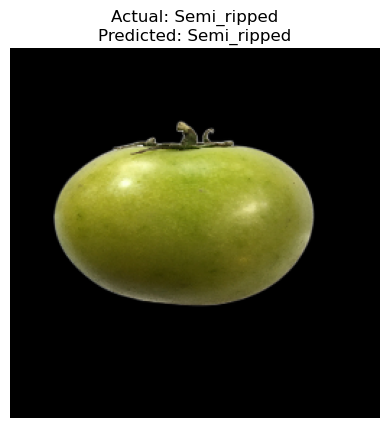

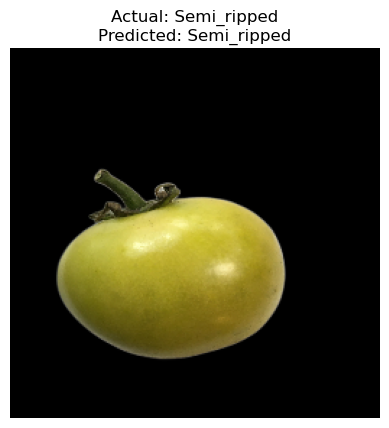

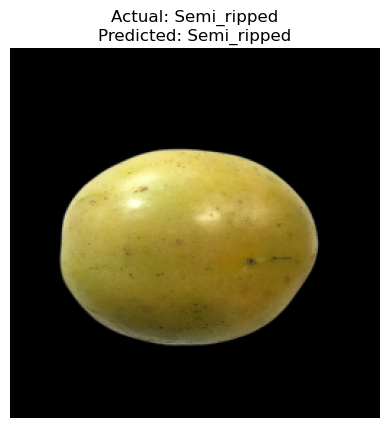

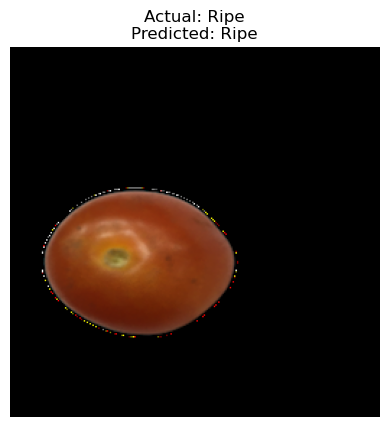

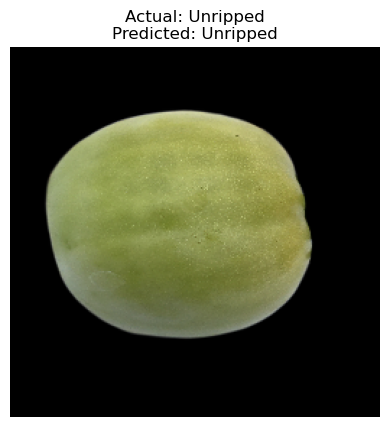

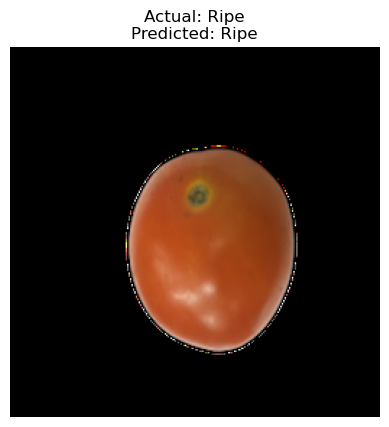

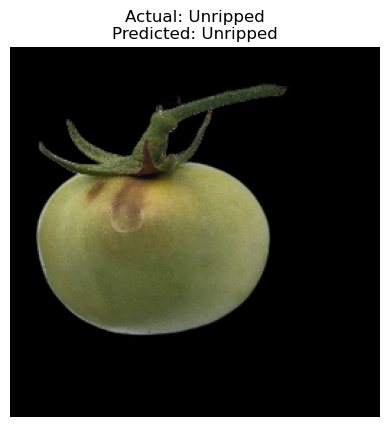

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Optional: Ensure eager execution is enabled (typically already is in TF 2.x)
tf.config.run_functions_eagerly(True)

# Loop through all batches in the test dataset
for images_batch, labels_batch in test_ds:
    # Convert batch to NumPy arrays
    images_np = images_batch.numpy().astype('uint8')
    labels_np = labels_batch.numpy()

    # Predict the batch
    batch_prediction = model.predict(images_batch)

    # Loop through each image in the batch
    for i in range(len(images_np)):
        image = images_np[i]
        label = labels_np[i]

        # Get predicted label
        predicted_index = np.argmax(batch_prediction[i])
        predicted_class = class_names[predicted_index]

        # Show the image with actual & predicted label
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Actual: {class_names[label]}\nPredicted: {predicted_class}")
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


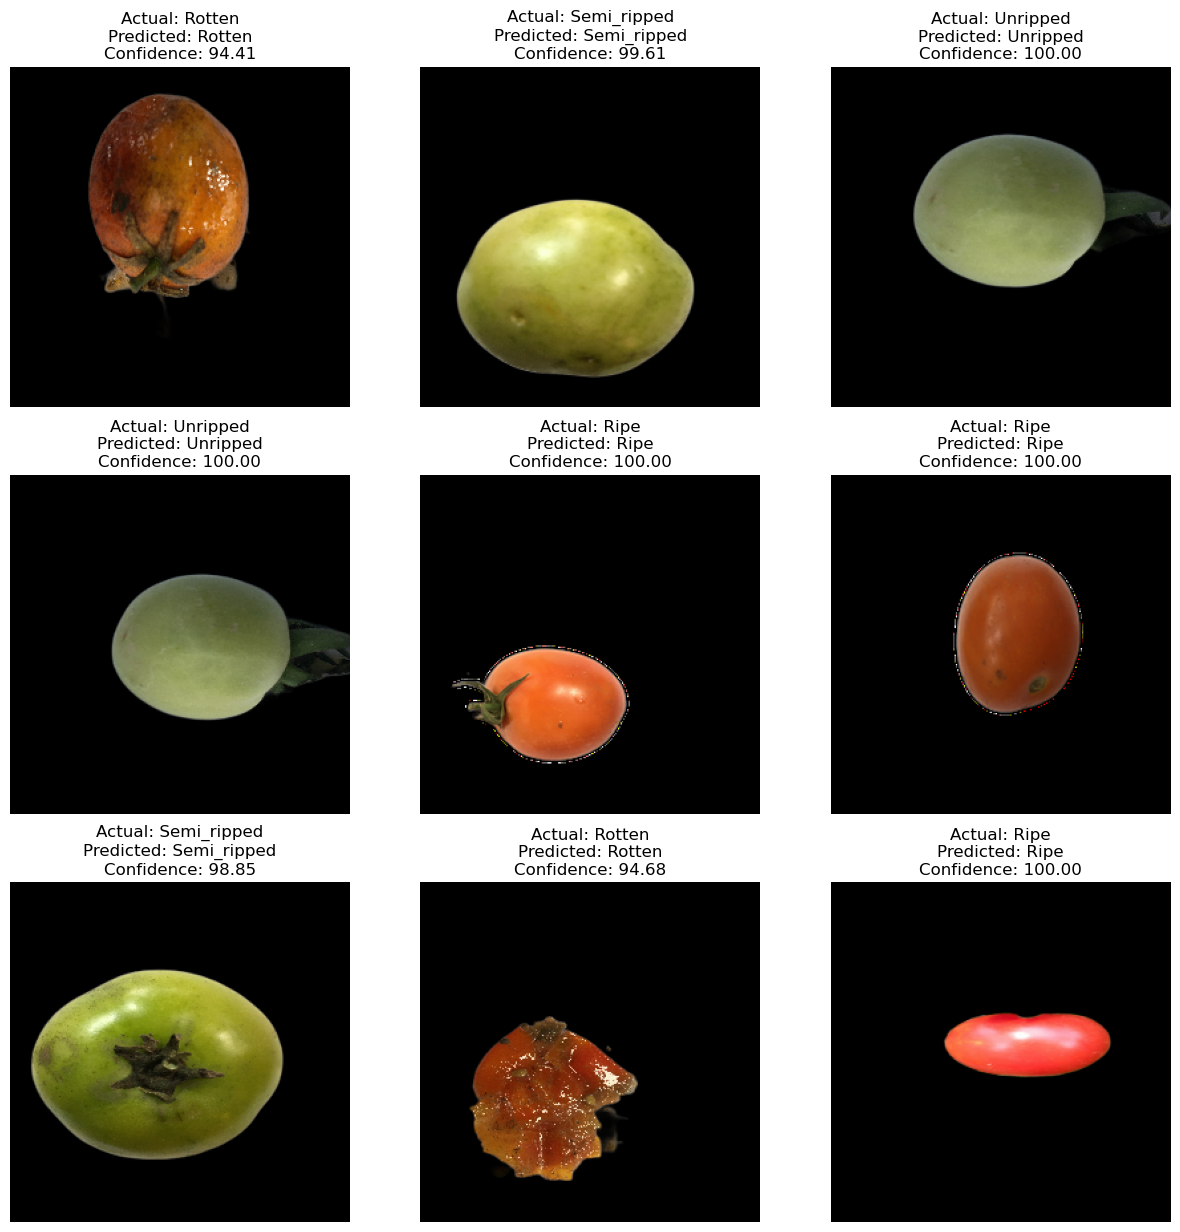

In [126]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(
            f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}"
        )
        plt.axis("off")


In [113]:
model.save("tomato_final_model.keras")


In [41]:
# i want model to train itself using a color

In [ ]:
#I want to model to train model to look if there is presence of large pores

In [ ]:
#For lalit
#from tensorflow import keras
# model = keras.models.load_model("tomato_final_model.keras")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


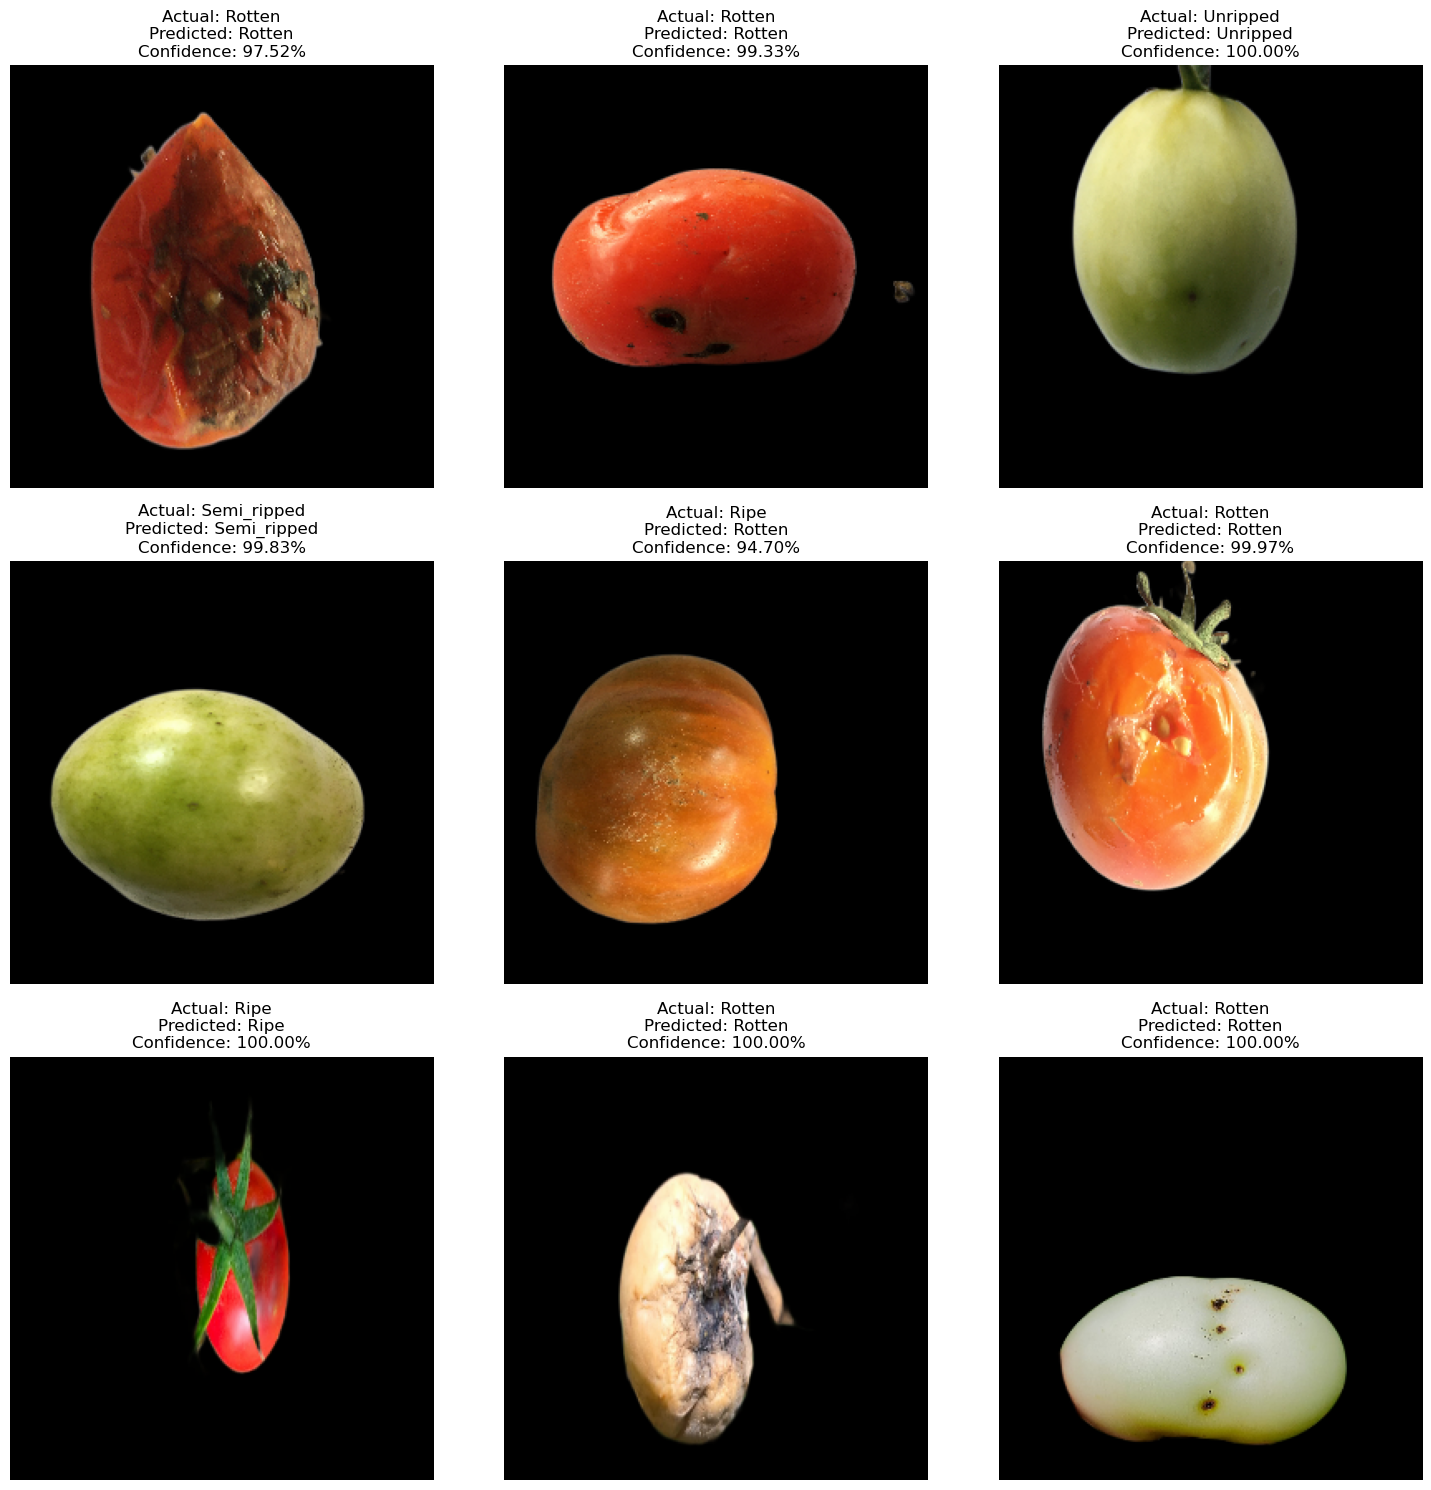